![logo](logo/DaftCode_logo_854x210.jpg)

# 2. Praktyczne Pakiety do Analizy Danych i Machine Learningu

Ćwiczenia do tego tematu znajdziesz --> [TUTAJ](Zadania.ipynb)

## Wstęp

    Import biblioteki i opcje formatowania wyświetlania w Jupyterze

In [2]:
import pandas as pd
pd.set_option('max_rows', 10)

    Wczytanie danych, typ przechowywania 

In [3]:
dane = pd.read_csv('data/xtrain_1.csv')
type(dane)

/home/model/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,3,11,16,23,90,92,95,102,141,151,185,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


pandas.core.frame.DataFrame

    Dane możemy podejrzeć używając funkcji `head()` na obiekcie typu `DataFrame` z domyślnym parameterem n=5. Chcąc podejrzeć wszystkie kolumny modyfikujemy opcje w pandasie poleceniem:

```python
pd.set_option('max_columns', 233)
```

In [4]:
dane.head()

,x72496,x32520,x46219,x97734,x98434,x13664,x83336,x48420,x97674,agent_type,...,navigatorproductsub,navigatorappcodename,language,useragent,donottrack,timezoneoffset,navigatorplatform,navigatorjavaenabled,navigatorcookieenabled,parsed_user_agent
0,NaN,NaN,2016-01-30,NaN,2016-02-01,2016-02-01,success,0.0,0.0,browser_mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,not found,NaN,NaN,browser_computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2015-12-04,NaN,2016-02-01,2016-02-01,success,0.0,0.0,browser_computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,not found,NaN,NaN,browser_computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2014-09-28,NaN,2016-02-01,2016-02-01,success,0.0,0.0,browser_computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Każdy obiekt typu `DataFrame` ma pola `index` oraz `columns`. Oba są pandasowego typu `Index`, który można sprowadzić do podstawowego typu `list`.

In [5]:
dane.columns

Index([u'x72496', u'x32520', u'x46219', u'x97734', u'x98434', u'x13664',
       u'x83336', u'x48420', u'x97674', u'agent_type',
       ...
       u'navigatorproductsub', u'navigatorappcodename', u'language',
       u'useragent', u'donottrack', u'timezoneoffset', u'navigatorplatform',
       u'navigatorjavaenabled', u'navigatorcookieenabled',
       u'parsed_user_agent'],
      dtype='object', length=233)

In [6]:
dane.index

RangeIndex(start=0, stop=17253, step=1)

In [7]:
dane.index.tolist()
dane.columns.tolist()

['x72496',
 'x32520',
 'x46219',
 'x97734',
 'x98434',
 'x13664',
 'x83336',
 'x48420',
 'x97674',
 'agent_type',
 'api_call_datetime',
 'browser',
 'browser_language',
 'browser_string',
 'browser_string_hash',
 'browser_string_mismatch',
 'browser_version',
 'cc_bin_number',
 'cc_bin_number_brand',
 'cc_bin_number_category',
 'cc_bin_number_geo',
 'cc_bin_number_org',
 'cc_bin_number_type',
 'cc_number_hash_assert_history',
 'cc_number_hash_first_seen',
 'cc_number_hash_last_event',
 'cc_number_hash_last_update',
 'cc_number_hash_result',
 'cc_number_hash_score',
 'cc_number_hash_worst_score',
 'cidr_number',
 'x21877',
 'custom_count_1',
 'custom_count_2',
 'custom_count_3',
 'custom_count_4',
 'x87918',
 'x68280',
 'x31255',
 'x85112',
 'x18591',
 'x35653',
 'x75049',
 'x76409',
 'x80911',
 'x96255',
 'x60781',
 'x23739',
 'dns_ip_city',
 'dns_ip_geo',
 'dns_ip_isp',
 'dns_ip_latitude',
 'dns_ip_longitude',
 'dns_ip_organization',
 'dns_ip_region',
 'dns_ip_region_iso_code',
 'x529

### Odwołania do kolumn i wierszy

### 1. Po nazwie

In [8]:
col1 = dane['agent_type']
print type(col1)
col1

<class 'pandas.core.series.Series'>


0          browser_mobile
1        browser_computer
2        browser_computer
3        browser_computer
4        browser_computer
               ...       
17248      browser_mobile
17249      browser_mobile
17250    browser_computer
17251      browser_mobile
17252    browser_computer
Name: agent_type, dtype: object

In [9]:
col2 = dane[['agent_type', 'browser_string']]
print type(col2)
col2

<class 'pandas.core.frame.DataFrame'>


,agent_type,browser_string
0,browser_mobile,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6 Bui...
1,browser_computer,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...
2,browser_computer,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
3,browser_computer,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
4,browser_computer,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
...,...,...
17248,browser_mobile,Mozilla/5.0 (Linux; Android 6.0.1; SM-G935F Bu...
17249,browser_mobile,Mozilla/5.0 (Linux; Android 6.0.1; SM-G900T Bu...
17250,browser_computer,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3...
17251,browser_mobile,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...


### 2. pandasDataFrame.iloc

Odwołanie do elementu

In [10]:
dane.iloc[0, 2]

'2016-01-30'

Odwołanie do wiersza

In [11]:
print type(dane.iloc[2])
dane.iloc[2]

<class 'pandas.core.series.Series'>


x72496                           NaN
x32520                           NaN
x46219                    2015-12-04
x97734                           NaN
x98434                    2016-02-01
                             ...    
timezoneoffset                   NaN
navigatorplatform                NaN
navigatorjavaenabled             NaN
navigatorcookieenabled           NaN
parsed_user_agent                NaN
Name: 2, dtype: object

Odwołanie do podramki

In [12]:
print type(dane.iloc[[2,-5],[5, 10]])
dane.iloc[[2,-5],[5, 10]]

<class 'pandas.core.frame.DataFrame'>


,x13664,api_call_datetime
2,2016-02-01,NaN
17248,2016-07-19,NaN


In [13]:
print type(dane.iloc[-5,range(0,20,2)])
dane.iloc[-5,range(0,20,2)]

<class 'pandas.core.series.Series'>


x72496                                              NaN
x46219                                       2016-06-24
x98434                                       2016-07-19
x83336                                          success
x97674                                                0
api_call_datetime                                   NaN
browser_language             en-PH,en-US;q=0.8,en;q=0.6
browser_string_hash    04e314c9778a194e9a8bf4901d23f9e5
browser_version                                      51
cc_bin_number_brand                                VISA
Name: 17248, dtype: object

### 3. pandasDataFrame.loc

In [14]:
dane.loc[0, 'cc_bin_number']

434769.0

In [15]:
dane.loc[0, ['cc_bin_number', 'api_call_datetime']]

cc_bin_number        434769
api_call_datetime       NaN
Name: 0, dtype: object

In [16]:
dane.loc[range(5), 'cc_bin_number']

0    434769.0
1    533248.0
2    418646.0
3    545958.0
4    527267.0
Name: cc_bin_number, dtype: float64

## Operacje na obiektach typu `DataFrame` i `Series`

### DataFrame.dtypes

In [17]:
dane.dtypes

x72496                     object
x32520                     object
x46219                     object
x97734                     object
x98434                     object
                           ...   
timezoneoffset            float64
navigatorplatform          object
navigatorjavaenabled       object
navigatorcookieenabled     object
parsed_user_agent         float64
dtype: object

Zauważmy, że komenda `dane.dtypes` zwraca obiekt typu `Series`. Możemy więc wykonywać na nim wszystkie operacje dopuszczalne na tym typie danych.

### Series.value_counts()

In [18]:
dane.dtypes.value_counts()

object     157
float64     72
int64        4
dtype: int64

In [19]:
dane.dtypes.value_counts().value_counts()

4      1
157    1
72     1
dtype: int64

## DataFrame.shape, Series.shape

In [20]:
dane.shape, dane['received_at'].shape

((17253, 233), (17253,))

## DataFrame.describe()

In [21]:
dane.describe()
# dane.describe(percentiles=[0.2,0.8])

,x48420,x97674,api_call_datetime,cc_bin_number,cc_number_hash_score,cc_number_hash_worst_score,cidr_number,custom_count_1,custom_count_2,custom_count_3,...,tcp_ttl,tcp_win,headers_content_type,headers_content_length,timeoftotalpageload,timeofrequestresponse,windowhistory,navigatorproductsub,timezoneoffset,parsed_user_agent
count,11123.000000,11123.000000,0.0,17251.000000,8315.000000,8315.000000,107.000000,16949.000000,16949.000000,17244.000000,...,14618.000000,14618.000000,0.0,0.0,1.155300e+04,1.155300e+04,13170.000000,1.293500e+04,13170.000000,0.0
mean,0.019689,-0.075339,NaN,477258.943134,0.000601,-0.009862,12.271028,2.276122,1.482270,2.423220,...,73.746614,41100.227528,NaN,NaN,-2.914829e+09,5.065859e+08,1.363402,2.003561e+07,29.953303,NaN
std,0.292366,1.114101,NaN,47189.542786,0.094977,0.403436,12.192304,2.850928,1.307147,4.699799,...,35.163648,27270.348959,NaN,NaN,6.526574e+10,3.337334e+10,2.369548,1.883967e+04,302.498919,NaN
min,-9.000000,-55.000000,NaN,352842.000000,-6.000000,-29.000000,0.000000,1.000000,1.000000,1.000000,...,17.000000,2048.000000,NaN,NaN,-1.468661e+12,-1.467336e+12,1.000000,2.003011e+07,-780.000000,NaN
25%,0.000000,0.000000,NaN,440452.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,51.000000,8192.000000,NaN,NaN,4.001000e+03,1.280000e+02,1.000000,2.003011e+07,-120.000000,NaN
50%,0.000000,0.000000,NaN,474476.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,...,53.000000,65535.000000,NaN,NaN,5.874000e+03,2.480000e+02,1.000000,2.003011e+07,0.000000,NaN
75%,0.000000,0.000000,NaN,519463.000000,0.000000,0.000000,26.000000,3.000000,2.000000,2.000000,...,113.000000,65535.000000,NaN,NaN,9.349000e+03,5.250000e+02,1.000000,2.003011e+07,300.000000,NaN
max,5.000000,0.000000,NaN,655920.000000,5.000000,0.000000,30.000000,95.000000,64.000000,121.000000,...,249.000000,65535.000000,NaN,NaN,3.595090e+05,1.467818e+12,100.000000,2.010010e+07,720.000000,NaN


### DataFrame.select_dtypes()

In [22]:
dane.select_dtypes(include=['float64'])

,x48420,x97674,api_call_datetime,cc_bin_number,cc_number_hash_score,cc_number_hash_worst_score,cidr_number,custom_count_1,custom_count_2,custom_count_3,...,tcp_ttl,tcp_win,headers_content_type,headers_content_length,timeoftotalpageload,timeofrequestresponse,windowhistory,navigatorproductsub,timezoneoffset,parsed_user_agent
0,0.0,0.0,NaN,434769.0,0.0,0.0,NaN,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,533248.0,NaN,NaN,NaN,1.0,1.0,1.0,...,111.0,8192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,NaN,418646.0,0.0,0.0,NaN,3.0,2.0,2.0,...,110.0,8192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,545958.0,0.0,0.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,NaN,527267.0,0.0,0.0,NaN,36.0,42.0,17.0,...,112.0,8192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17248,0.0,0.0,NaN,405598.0,0.0,0.0,NaN,3.0,2.0,5.0,...,50.0,65535.0,NaN,NaN,4934.0,1166.0,1.0,20030107.0,-480.0,NaN
17249,0.0,0.0,NaN,490150.0,0.0,0.0,NaN,5.0,2.0,4.0,...,50.0,14600.0,NaN,NaN,7063.0,639.0,1.0,20030107.0,240.0,NaN
17250,NaN,NaN,NaN,492010.0,NaN,NaN,NaN,1.0,1.0,1.0,...,50.0,65535.0,NaN,NaN,3467.0,82.0,1.0,20030107.0,-180.0,NaN
17251,0.0,0.0,NaN,554501.0,0.0,0.0,NaN,2.0,1.0,2.0,...,56.0,65535.0,NaN,NaN,1030.0,72.0,2.0,20030107.0,-120.0,NaN


In [23]:
dane.select_dtypes(include=[float])

,x48420,x97674,api_call_datetime,cc_bin_number,cc_number_hash_score,cc_number_hash_worst_score,cidr_number,custom_count_1,custom_count_2,custom_count_3,...,tcp_ttl,tcp_win,headers_content_type,headers_content_length,timeoftotalpageload,timeofrequestresponse,windowhistory,navigatorproductsub,timezoneoffset,parsed_user_agent
0,0.0,0.0,NaN,434769.0,0.0,0.0,NaN,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,533248.0,NaN,NaN,NaN,1.0,1.0,1.0,...,111.0,8192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,NaN,418646.0,0.0,0.0,NaN,3.0,2.0,2.0,...,110.0,8192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,545958.0,0.0,0.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,NaN,527267.0,0.0,0.0,NaN,36.0,42.0,17.0,...,112.0,8192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17248,0.0,0.0,NaN,405598.0,0.0,0.0,NaN,3.0,2.0,5.0,...,50.0,65535.0,NaN,NaN,4934.0,1166.0,1.0,20030107.0,-480.0,NaN
17249,0.0,0.0,NaN,490150.0,0.0,0.0,NaN,5.0,2.0,4.0,...,50.0,14600.0,NaN,NaN,7063.0,639.0,1.0,20030107.0,240.0,NaN
17250,NaN,NaN,NaN,492010.0,NaN,NaN,NaN,1.0,1.0,1.0,...,50.0,65535.0,NaN,NaN,3467.0,82.0,1.0,20030107.0,-180.0,NaN
17251,0.0,0.0,NaN,554501.0,0.0,0.0,NaN,2.0,1.0,2.0,...,56.0,65535.0,NaN,NaN,1030.0,72.0,2.0,20030107.0,-120.0,NaN


### Series.str

In [24]:
dane.columns.str.upper()

Index([u'X72496', u'X32520', u'X46219', u'X97734', u'X98434', u'X13664',
       u'X83336', u'X48420', u'X97674', u'AGENT_TYPE',
       ...
       u'NAVIGATORPRODUCTSUB', u'NAVIGATORAPPCODENAME', u'LANGUAGE',
       u'USERAGENT', u'DONOTTRACK', u'TIMEZONEOFFSET', u'NAVIGATORPLATFORM',
       u'NAVIGATORJAVAENABLED', u'NAVIGATORCOOKIEENABLED',
       u'PARSED_USER_AGENT'],
      dtype='object', length=233)

In [25]:
dane.columns.str.contains('time')

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [26]:
dane.columns.str.split('_')

Index([                   [u'x72496'],                    [u'x32520'],
                          [u'x46219'],                    [u'x97734'],
                          [u'x98434'],                    [u'x13664'],
                          [u'x83336'],                    [u'x48420'],
                          [u'x97674'],            [u'agent', u'type'],
       ...
             [u'navigatorproductsub'],      [u'navigatorappcodename'],
                        [u'language'],                 [u'useragent'],
                      [u'donottrack'],            [u'timezoneoffset'],
               [u'navigatorplatform'],      [u'navigatorjavaenabled'],
          [u'navigatorcookieenabled'], [u'parsed', u'user', u'agent']],
      dtype='object', length=233)

### pd.as_datetime()

In [27]:
time_col = dane['received_at']
pd.to_datetime(time_col)

0       2016-02-01 00:17:04.868767
1       2016-02-01 00:18:25.306223
2       2016-02-01 00:59:08.984223
3       2016-02-01 01:04:20.917560
4       2016-02-01 01:14:27.925451
                   ...            
17248   2016-07-19 03:21:49.980091
17249   2016-07-19 03:24:50.465369
17250   2016-07-19 03:31:30.081143
17251   2016-07-19 04:12:33.612790
17252   2016-07-19 04:33:46.929462
Name: received_at, dtype: datetime64[ns]

In [28]:
time_col = pd.to_datetime(time_col, format='%Y-%m-%d %H:%M:%S.%f')
time_col

0       2016-02-01 00:17:04.868767
1       2016-02-01 00:18:25.306223
2       2016-02-01 00:59:08.984223
3       2016-02-01 01:04:20.917560
4       2016-02-01 01:14:27.925451
                   ...            
17248   2016-07-19 03:21:49.980091
17249   2016-07-19 03:24:50.465369
17250   2016-07-19 03:31:30.081143
17251   2016-07-19 04:12:33.612790
17252   2016-07-19 04:33:46.929462
Name: received_at, dtype: datetime64[ns]

In [29]:
t1 = time_col.iloc[-10]
t1

Timestamp('2016-07-19 02:27:15.875652')

In [30]:
t1.weekday()

1

In [31]:
t1.hour

2

## DataFrame.apply(), Series.apply(), DataFrame.applymap()

Uwaga: `apply` działa na obiektach typu `Series`. Wywołując `apply` na obiekcie `DataFrame` musimy podać kierunek działania, tzn, `axis=0` jeśli chcemy wykonać funkcję kolumnowo i `axis=1` jeśli wierszowo. Domyślną wartością jest `axis=0`.

In [32]:
import math
dane['cc_bin_number'].apply(math.sqrt)

0        659.370154
1        730.238317
2        647.028593
3        738.889708
4        726.131531
            ...    
17248    636.865763
17249    700.107135
17250    701.434245
17251    744.648239
17252    673.608195
Name: cc_bin_number, dtype: float64

In [33]:
dane['cc_bin_number'].apply(lambda x: x%2)

0        1.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
17248    0.0
17249    0.0
17250    0.0
17251    1.0
17252    0.0
Name: cc_bin_number, dtype: float64

In [34]:
dane.apply(lambda col: col.max())

x72496                                           CHARGE_BACK
x32520                    ["NEGATIVE_HISTORY", "SUSPICIOUS"]
x46219                                            2016-07-19
x97734                                            2016-04-28
x98434                                            2016-07-20
                                         ...                
timezoneoffset                                           720
navigatorplatform                                      win32
navigatorjavaenabled                                    True
navigatorcookieenabled                                  True
parsed_user_agent                                        NaN
dtype: object

In [35]:
dane.apply(lambda row: row.min(), axis=1)

0       -300.0
1       -300.0
2       -300.0
3       -360.0
4       -360.0
         ...  
17248   -480.0
17249   -240.0
17250   -180.0
17251   -120.0
17252   -300.0
dtype: float64

In [36]:
dane.apply(lambda col: col.isnull())

,x72496,x32520,x46219,x97734,x98434,x13664,x83336,x48420,x97674,agent_type,...,navigatorproductsub,navigatorappcodename,language,useragent,donottrack,timezoneoffset,navigatorplatform,navigatorjavaenabled,navigatorcookieenabled,parsed_user_agent
0,True,True,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2,True,True,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,True,True,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17248,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17249,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17250,True,True,True,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
17251,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [37]:
dane.apply(lambda col: col.isnull().all())

x72496                    False
x32520                    False
x46219                    False
x97734                    False
x98434                    False
                          ...  
timezoneoffset            False
navigatorplatform         False
navigatorjavaenabled      False
navigatorcookieenabled    False
parsed_user_agent          True
dtype: bool

In [38]:
dane.apply(lambda col: col.isnull().all()).mean()

0.051502145922746781

In [39]:
dane.applymap(pd.isnull)

,x72496,x32520,x46219,x97734,x98434,x13664,x83336,x48420,x97674,agent_type,...,navigatorproductsub,navigatorappcodename,language,useragent,donottrack,timezoneoffset,navigatorplatform,navigatorjavaenabled,navigatorcookieenabled,parsed_user_agent
0,True,True,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2,True,True,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,True,True,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17248,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17249,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17250,True,True,True,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
17251,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Szybkie wykresy w pandasie

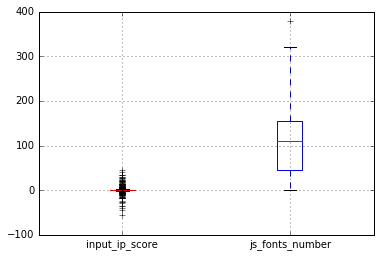

In [40]:
%matplotlib inline
dane[['input_ip_score', 'js_fonts_number']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x75d0e7258410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x75d0e70ca050>]], dtype=object)

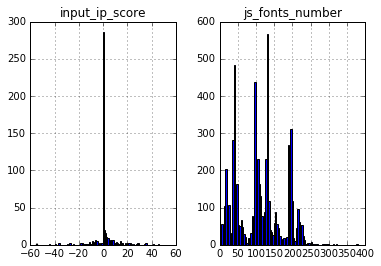

In [41]:
dane[['input_ip_score', 'js_fonts_number']].hist(bins=100)

I wiele wiele innych.
Zachęcamy do eksploracji tematu pod adresem: http://pandas.pydata.org/pandas-docs/stable/index.html.

# Numpy


    Jak zauważyliście obiekty typu DataFrame przechowują bardzo dużo dodatkowych informacji o indeksach, columnach, typach etc., co nie zawsze jest wydajne i niezbędne do obliczeń. Do budowy klasyfikatorów używać będziemy raczej obiektów typu numpy.array.

    Możemy łatwo przejść z typu padnas.Dataframe do numpy.array odwołując się do funkcji as_matrix().

In [42]:
dane.as_matrix()

array([[nan, nan, '2016-01-30', ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, '2015-12-04', ..., nan, nan, nan],
       ..., 
       [nan, nan, nan, ..., False, True, nan],
       [nan, nan, '2015-10-30', ..., False, True, nan],
       [nan, nan, nan, ..., False, True, nan]], dtype=object)

In [43]:
np_dane = dane.as_matrix()

In [44]:
import numpy as np

In [48]:
pd.set_option('max_columns', 240)
dane.tail()

,x72496,x32520,x46219,x97734,x98434,x13664,x83336,x48420,x97674,agent_type,api_call_datetime,browser,browser_language,browser_string,browser_string_hash,browser_string_mismatch,browser_version,cc_bin_number,cc_bin_number_brand,cc_bin_number_category,cc_bin_number_geo,cc_bin_number_org,cc_bin_number_type,cc_number_hash_assert_history,cc_number_hash_first_seen,cc_number_hash_last_event,cc_number_hash_last_update,cc_number_hash_result,cc_number_hash_score,cc_number_hash_worst_score,cidr_number,x21877,custom_count_1,custom_count_2,custom_count_3,custom_count_4,x87918,x68280,x31255,x85112,x18591,x35653,x75049,x76409,x80911,x96255,x60781,x23739,dns_ip_city,dns_ip_geo,dns_ip_isp,dns_ip_latitude,dns_ip_longitude,dns_ip_organization,dns_ip_region,dns_ip_region_iso_code,x5290,x5170,x5342,x5193,x92645,x31903,x94347,x82598,x40007,x13872,x59752,x14458,x85212,x54084,x3314,headers_name_value_hash,headers_order_string_hash,x10047,x80385,input_ip_assert_history,input_ip_attributes,input_ip_city,input_ip_first_seen,input_ip_geo,input_ip_isp,input_ip_last_event,input_ip_last_update,input_ip_latitude,input_ip_longitude,input_ip_organization,input_ip_region,input_ip_region_iso_code,input_ip_result,input_ip_score,js_browser,js_browser_string,js_browser_string_hash,js_fonts_hash,js_fonts_number,js_os,mime_type_hash,mime_type_number,os,x21202,x33709,x12964,x2801,x70617,x48486,x52094,x46567,x46591,x44170,x44566,x42973,x39150,x41009,x83032,x98509,x21215,x50289,x1384,x3370,x91746,x51274,x3168,profiling_datetime,x42420,x66439,x50315,x66015,x51172,x92166,x92221,x58765,x64585,x67114,x3076,x63143,x26588,x38363,x26431,x42317,x97771,x73629,remote_desktop,request_duration,request_result,review_status,risk_rating,x55586,x5600,x9486,x9789,x40163,x16453,session_id,session_id_query_count,x14739,x61305,x80025,time_zone,time_zone_dst_offset,transaction_currency,x71910,x84525,x76585,x75714,x16584,x52116,x11958,x7971,x46383,x71182,x30901,x96316,x31318,x70806,x43300,x55037,x12050,x58838,x87611,id,reference,expiration_year,expiration_month,received_at,bin,bin_country,client_status_code,session_id.1,transaction_amount,transaction_currency.1,application_id,user_reference,user_ip_address,user_ip_country,card_level,supports_3d,checked,returns_not_authorized,card_type,country_code,modified,card_brand,name,tcp_mss,tcp_tos,tcp_ttl,tcp_win,tcp_os_name,tcp_os_flavor,headers_accept,headers_connection,headers_user_agent,headers_content_type,headers_content_length,headers_accept_encoding,headers_accept_language,timeoftotalpageload,timeofrequestresponse,windowhistory,navigatorvendor,navigatorappname,navigatorproduct,navigatorappversion,navigatorproductsub,navigatorappcodename,language,useragent,donottrack,timezoneoffset,navigatorplatform,navigatorjavaenabled,navigatorcookieenabled,parsed_user_agent
17248,NaN,NaN,2016-06-24,NaN,2016-07-19,2016-07-19,success,0.0,0.0,browser_mobile,NaN,Chrome,"en-PH,en-US;q=0.8,en;q=0.6",Mozilla/5.0 (Linux; Android 6.0.1; SM-G935F Bu...,04e314c9778a194e9a8bf4901d23f9e5,NaN,51,405598.0,VISA,CLASSIC,PH,METROBANK CARD CORPORATION (A FINANCE COMPANY),CREDIT,NaN,2016-07-18,2016-07-19,2016-07-19,success,0.0,0.0,NaN,yes,3.0,2.0,5.0,6.0,0.0,NaN,NaN,2016-07-18,db495b1abcc1462ebb815cbe0a833fde,100.0,2016-07-19,2016-07-19,success,success,0.0,0.0,makati city,PH,globe telecoms,14.56667,121.03333,globe telecom/innove communication,national capital region,NaN,yes,no,yes,yes,NaN,NaN,NaN,NaN,2016-07-18,db495b1abcc1462ebb815cbe0a833fde,100.0,2016-07-19,2016-07-19,0.0,0.0,4c6c595546d124c84ece8981614ea34e,e6003cc7d5fd407bc8f26b8bfba27db0,Linux 2.2.x-3.x,yes,NaN,NaN,makati city,NaN,PH,globe telecoms,NaN,NaN,14.56667,121.03333,globe telecom/innove communication,national capital region,NaN,NaN,NaN,Chrome 51,Mozilla/5.0 (Linux; Android 6.0.1; SM-G935F Bu...,04e314c9778a194e9a8bf4901d23f9e5,NaN,NaN,Android 6.0.1,NaN,NaN,Android,NaN,NaN,NaN,6.0.1,386377.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,0.0,land.purifier.cc,2015-12-18,2016-07-19,2016-07-19,success,0.0,0.0,1.468898e+

In [46]:
np.apply_over_axis(max, axis=1, np_dane)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-46-e0d0aa6c74d6>, line 1)

In [ ]:
np_dane.apply_along_axis(lambda x: max(x), axis=1)